In [53]:
from glob import glob
import locale
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [54]:
locale.setlocale(locale.LC_ALL,'pt')

'pt'

In [55]:
paths = glob('EAR/*')
columns = ['ear_data', 'ear_max_subsistema','ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual']
id_subs = ['NE','N','SE','S']
dataframe_EAR_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

for path in paths:
    df = pd.read_csv(path,sep=';')

    for key in dataframe_EAR_dict.keys():
        aux = df.loc[df['id_subsistema']==key].copy()
        aux.index = pd.to_datetime(aux[columns[0]])
        aux = aux[columns[1:]].copy()
        aux.columns = [element + f'_{key}' for element in aux.columns]
        dataframe_EAR_dict[key] = pd.concat([dataframe_EAR_dict[key], aux])

In [56]:
paths = glob('CMO_SEMANAL/*')
columns = ['din_instante', 'val_cmomediasemanal', 'val_cmoleve', 'val_cmomedia', 'val_cmopesada']
id_subs = ['NE','N','SE','S']
dataframe_CMO_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

for path in paths:
    df = pd.read_csv(path,sep=';')

    for key in dataframe_CMO_dict.keys():
        aux = df.loc[df['id_subsistema']==key].copy()
        aux.index = pd.to_datetime(aux[columns[0]])
        aux = aux[columns[1:]].copy()
        aux.columns = [element + f'_{key}' for element in aux.columns]
        dataframe_CMO_dict[key] = pd.concat([dataframe_CMO_dict[key], aux])

In [57]:
final_EAR_dataframe = pd.concat(list(dataframe_EAR_dict.values()),axis=1)

In [58]:
final_CMO_dataframe = pd.concat(list(dataframe_CMO_dict.values()),axis=1)

In [78]:
final_CMO_dataframe.max()

val_cmomediasemanal_NE    3044.45
val_cmoleve_NE            2995.74
val_cmomedia_NE           3069.18
val_cmopesada_NE          3091.73
val_cmomediasemanal_N     3044.45
val_cmoleve_N             2995.74
val_cmomedia_N            3069.18
val_cmopesada_N           3091.73
val_cmomediasemanal_SE    3044.45
val_cmoleve_SE            2995.74
val_cmomedia_SE           3069.18
val_cmopesada_SE          3091.73
val_cmomediasemanal_S     3044.45
val_cmoleve_S             2995.74
val_cmomedia_S            3069.18
val_cmopesada_S           3091.73
dtype: float64

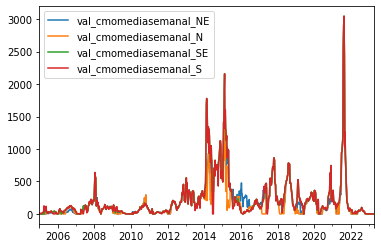

In [76]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[0::4]]).plot(xlabel='')

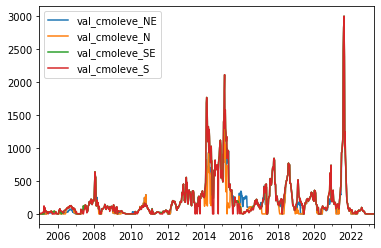

In [79]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[1::4]]).plot(xlabel='')

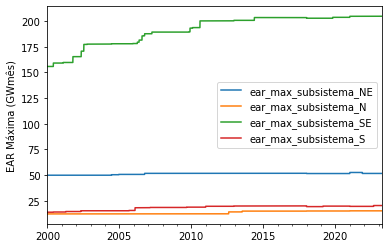

In [61]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
#ax.legend(['NE','N','SE','S'])

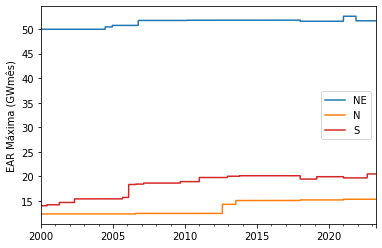

In [62]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.lines.remove(ax.lines[2])
#ax.set_ylim([5,60])
ax.relim()
ax.autoscale_view()
ax.legend(['NE','N','S'])

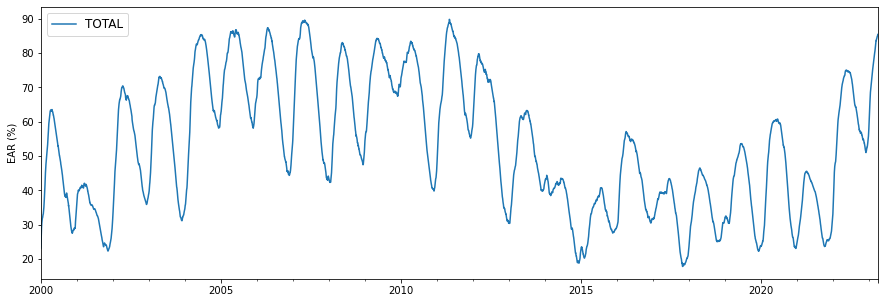

In [63]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
ax.legend(['TOTAL'], loc='upper left', fontsize=12)
#ax.set_ylim([0,100])

In [64]:
zoom_dataframe = final_EAR_dataframe.loc[lambda x: (x.index >= '2014-01-01')&(x.index <= '2022-01-01')]

In [65]:
armazenamento_total_df = pd.DataFrame(columns=['EAR%'])

In [66]:
armazenamento_total_df['EAR%'] = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100)

In [67]:
recuperacao_deplecao_df = armazenamento_total_df.resample('YS').agg(['first','max'])['EAR%']

In [68]:
recuperacao_deplecao_df['min'] = armazenamento_total_df.loc[lambda x: x.index.month>7].resample('YS').agg(['min'])['EAR%']

In [69]:
recuperacao_deplecao_df['Variação'] = recuperacao_deplecao_df['max'] - recuperacao_deplecao_df['first']
recuperacao_deplecao_df['Variação_f'] = (recuperacao_deplecao_df['min'] - recuperacao_deplecao_df['max'])

In [70]:
recuperacao_deplecao_df.head()

,first,max,min,Variação,Variação_f
ear_data,,,,,
2000-01-01,23.177150,63.561956,27.580614,40.384806,-35.981341
2001-01-01,36.940582,42.080586,22.337448,5.140003,-19.743138
2002-01-01,32.581431,70.388474,35.873638,37.807043,-34.514836
2003-01-01,39.178490,73.246061,31.145486,34.067571,-42.100575
2004-01-01,34.644000,85.425425,58.139390,50.781424,-27.286035


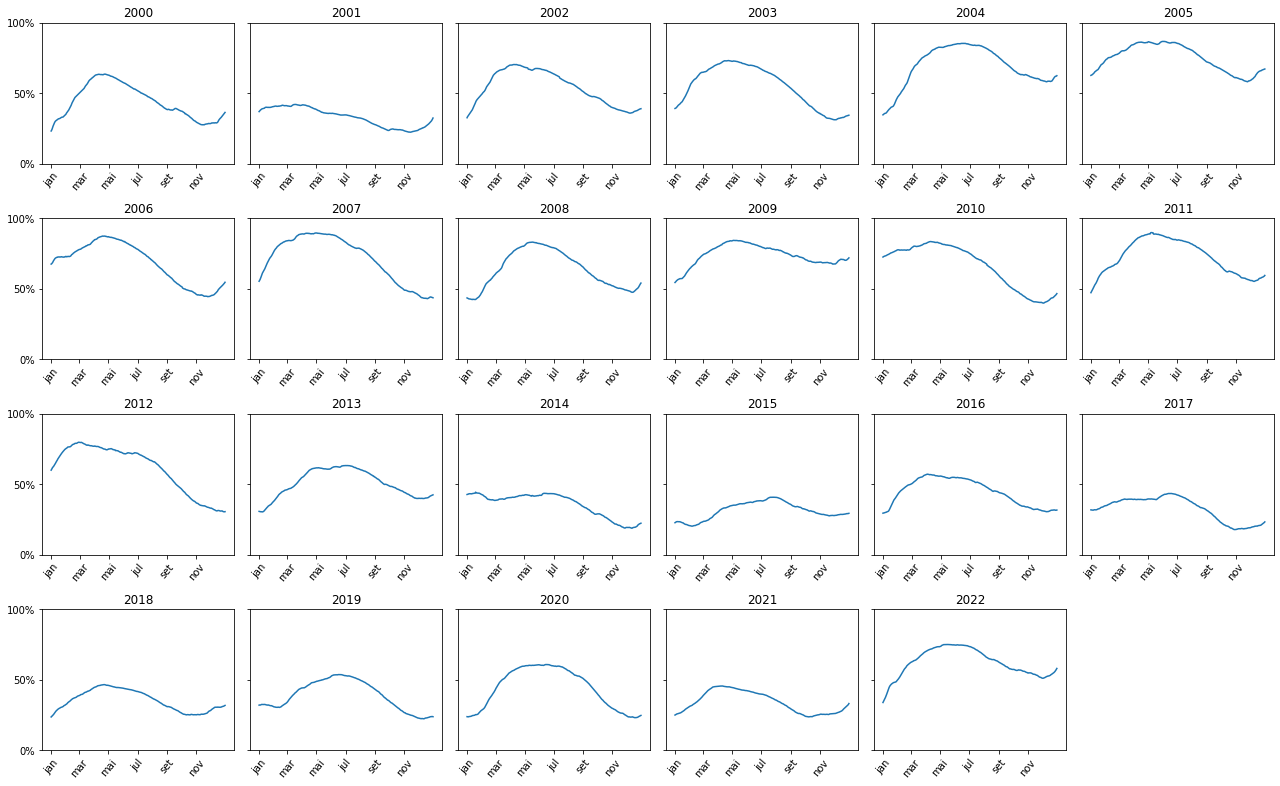

In [71]:
n_rows=4
n_columns = 6

fig, ax = plt.subplots(n_rows,n_columns)
fig.set_size_inches(18, 11)


a = list(range(n_rows))
b = list(range(n_columns))
generator = ((element_a,element_b) for element_a in a for element_b in b)



for year in range(2000,2024):
    index = next(generator)
    axis = ax[index[0]][index[1]]

    x=armazenamento_total_df.loc[lambda x: x.index.year==year].index
    y=armazenamento_total_df.loc[lambda x: x.index.year==year]['EAR%'].values

    axis.plot(x,y)
    
    axis.set_yticks([0,50,100])
    axis.set_title(str(year))

    if index[1]==0:
        axis.set_yticklabels(['0%','50%','100%'])
    else:
        axis.set_yticklabels(['','',''])


    daterange = pd.date_range(start =f'{year}-01-01', end =f'{year}-12-31', freq ='2MS')
    label = [datetime.datetime.strftime(date,'%b') for date in daterange]
    axis.set_xticks(daterange)
    axis.set_xticklabels(label)

    axis.tick_params(axis='x',rotation=50)

fig.tight_layout(pad=1)

ax[-1][-1].axis('off')
ax[-1][-1].set_title('')
ax[-1][-1].lines[0].remove()

plt.savefig('EAR GRID.png', dpi=300)


(-55.0, 90.0)

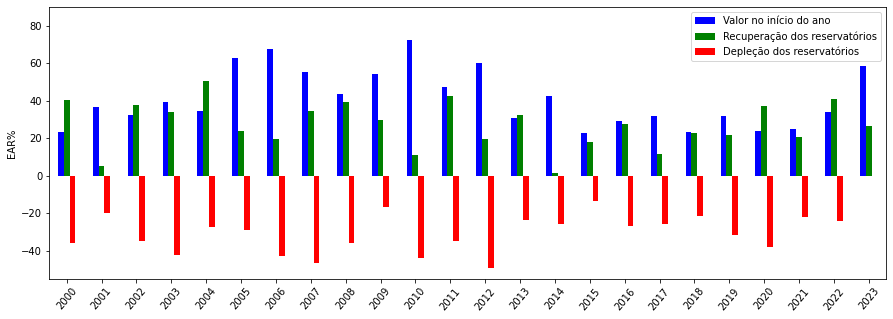

In [72]:
ax = recuperacao_deplecao_df[['first', 'Variação', 'Variação_f']].plot(kind='bar', figsize=(15,5), color=['blue','green','red'])
ax.set_xticklabels([datetime.datetime.strftime(date,'%Y') for date in recuperacao_deplecao_df.index ])
ax.tick_params(axis='x',rotation=50)
ax.legend(['Valor no início do ano','Recuperação dos reservatórios','Depleção dos reservatórios'])
ax.set_xlabel('')
ax.set_ylabel('EAR%')
ax.set_ylim((-55,90))

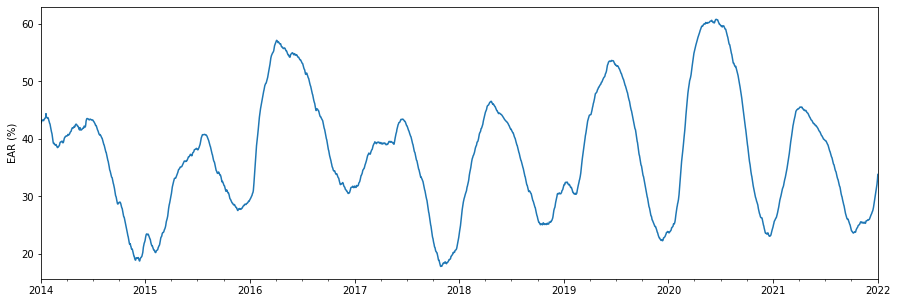

In [73]:
ax = (zoom_dataframe[zoom_dataframe.columns[1::3]].sum(axis=1)/zoom_dataframe[zoom_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
#ax.legend(['TOTAL'], loc='upper left', fontsize=15)

In [74]:
pos=['upper left', 'lower left', 'upper left', 'lower left']

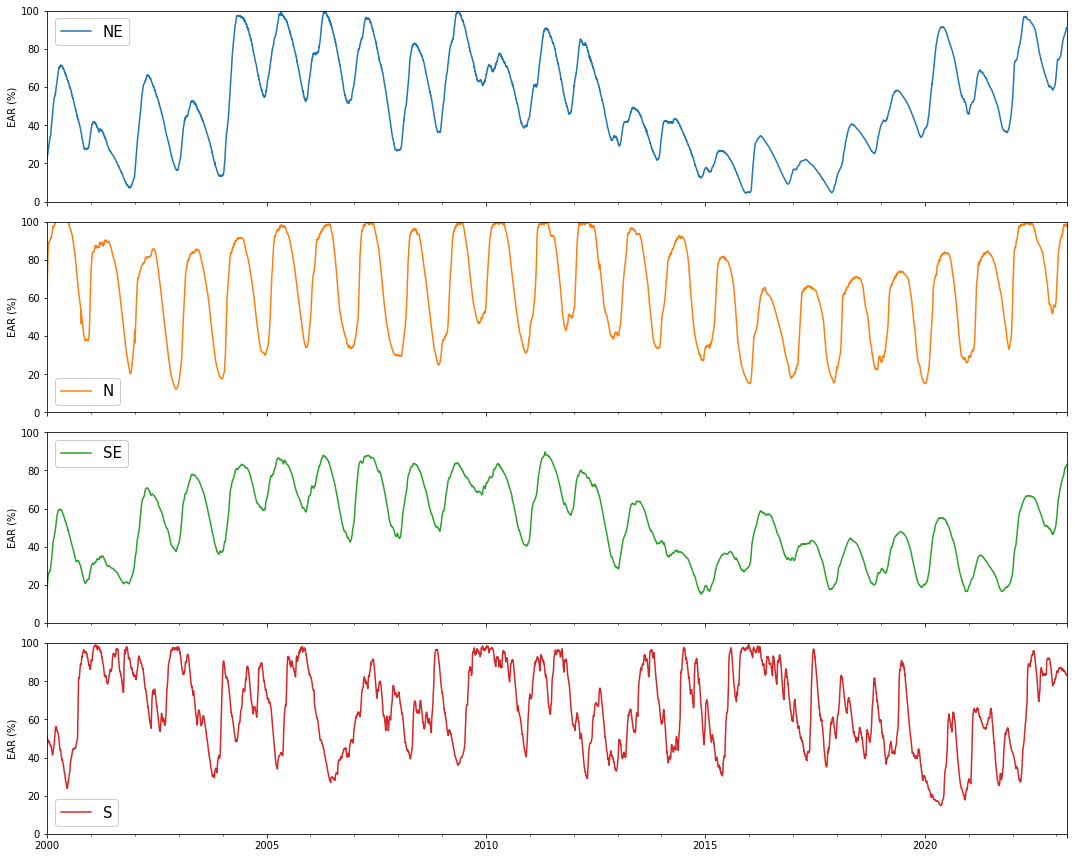

In [75]:
subplots = final_EAR_dataframe[final_EAR_dataframe.columns[2::3]].plot(subplots=True, layout=(4,1), figsize=(15,12), ylabel='EAR (%)', ylim=(0,100), xlabel='')
for i, subplop in enumerate(subplots):
    subplop[0].legend([id_subs[i]], loc=pos[i], framealpha=1, fontsize=15)
    
plt.tight_layout(pad=1)
_ = plt.savefig('Níveis_Energia_Armazenada.svg')